## Linear regression using the scikit-learn library

**Objectives of the Analysis**

1. Forecast future sales trends.
2. Identify key factors influencing sales performance.
3. Minimize stockouts and reduce excess inventory.

**Data**
1. Advertising Expenditure: Amount spent on advertisements (in dollars) across different marketing channels
2. Campaign Engagement Score: A score computed by the marketing team based on the engagement (likes, comments, shares) on social media campaigns
3. Discount Percentage: Average discount offered for a given product
4. Average Customer Rating: Average rating provided by customers for the product
5. Product Price: The price of the product (in dollars)
6. Return Rate: The average rate of return once the product has been delivered
7. Length of Product Description: Number of words in the description of the product
8. Region: Region where the product is sold (North, South, East, or West)
9. Popularity: The level of popularity of the product (ranges from very low to very high)
10. Sales: Amount of sales (in dollars)

### Data load and overview

In [94]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [95]:
sales = pd.read_csv('data/Sales.csv')

In [96]:
data = sales.copy()

In [97]:
pd.set_option('display.width', 1000)

In [21]:
data.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,High,26246.91291
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,Very High,21432.16935
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,Very High,22551.92436
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,Very High,27792.29446
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,Moderate,17354.77148


In [22]:
data.tail()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
2995,557.098500,39.733056,25.511859,4.705654,1491.415606,1.314891,143.790388,North,Moderate,21332.40603
2996,667.120978,54.746729,30.626235,4.374541,1259.077673,0.429627,378.527732,West,High,26780.91894
2997,653.702072,43.975689,28.177723,4.240031,1689.196119,0.956180,251.927969,South,Moderate,21217.38795
2998,539.521178,30.624460,26.914985,4.423562,1103.443317,2.271826,320.796878,West,High,22094.55742
2999,644.650377,63.915941,31.834084,4.427621,1714.536258,0.750080,281.425582,South,Very High,21770.06668


In [23]:
data.shape

(3000, 10)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Advertising Expenditure        3000 non-null   float64
 1   Campaign Engagement Score      3000 non-null   float64
 2   Discount Percentage            3000 non-null   float64
 3   Average Customer Rating        3000 non-null   float64
 4   Product Price                  3000 non-null   float64
 5   Return Rate                    3000 non-null   float64
 6   Length of Product Description  3000 non-null   float64
 7   Region                         3000 non-null   object 
 8   Popularity                     3000 non-null   object 
 9   Sales                          3000 non-null   float64
dtypes: float64(8), object(2)
memory usage: 234.5+ KB


In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Advertising Expenditure,3000.0,607.727150,82.025112,97.250000,561.984787,616.116596,666.331853,801.500000
Campaign Engagement Score,3000.0,49.456305,13.171290,0.000000,40.697530,49.478699,58.150891,98.750000
Discount Percentage,3000.0,28.997927,4.700923,0.000000,26.222998,29.552853,32.259294,40.540000
Average Customer Rating,3000.0,4.408783,0.227823,3.649450,4.251118,4.432254,4.583205,4.874450
Product Price,3000.0,1434.718134,222.832467,9.780000,1306.155958,1461.301831,1587.671790,2000.560000
Return Rate,3000.0,1.666106,0.900435,0.033720,0.954551,1.537856,2.285394,4.534866
Length of Product Description,3000.0,248.696636,60.800024,42.000000,207.076217,249.348398,288.875650,496.000000
Sales,3000.0,23858.638609,3611.748810,3257.595426,21632.968838,24087.129995,26421.772433,34421.427430


In [26]:
data.isnull().sum()

Advertising Expenditure          0
Campaign Engagement Score        0
Discount Percentage              0
Average Customer Rating          0
Product Price                    0
Return Rate                      0
Length of Product Description    0
Region                           0
Popularity                       0
Sales                            0
dtype: int64

In [27]:
data.duplicated().sum()

np.int64(0)

### EDA Univariate

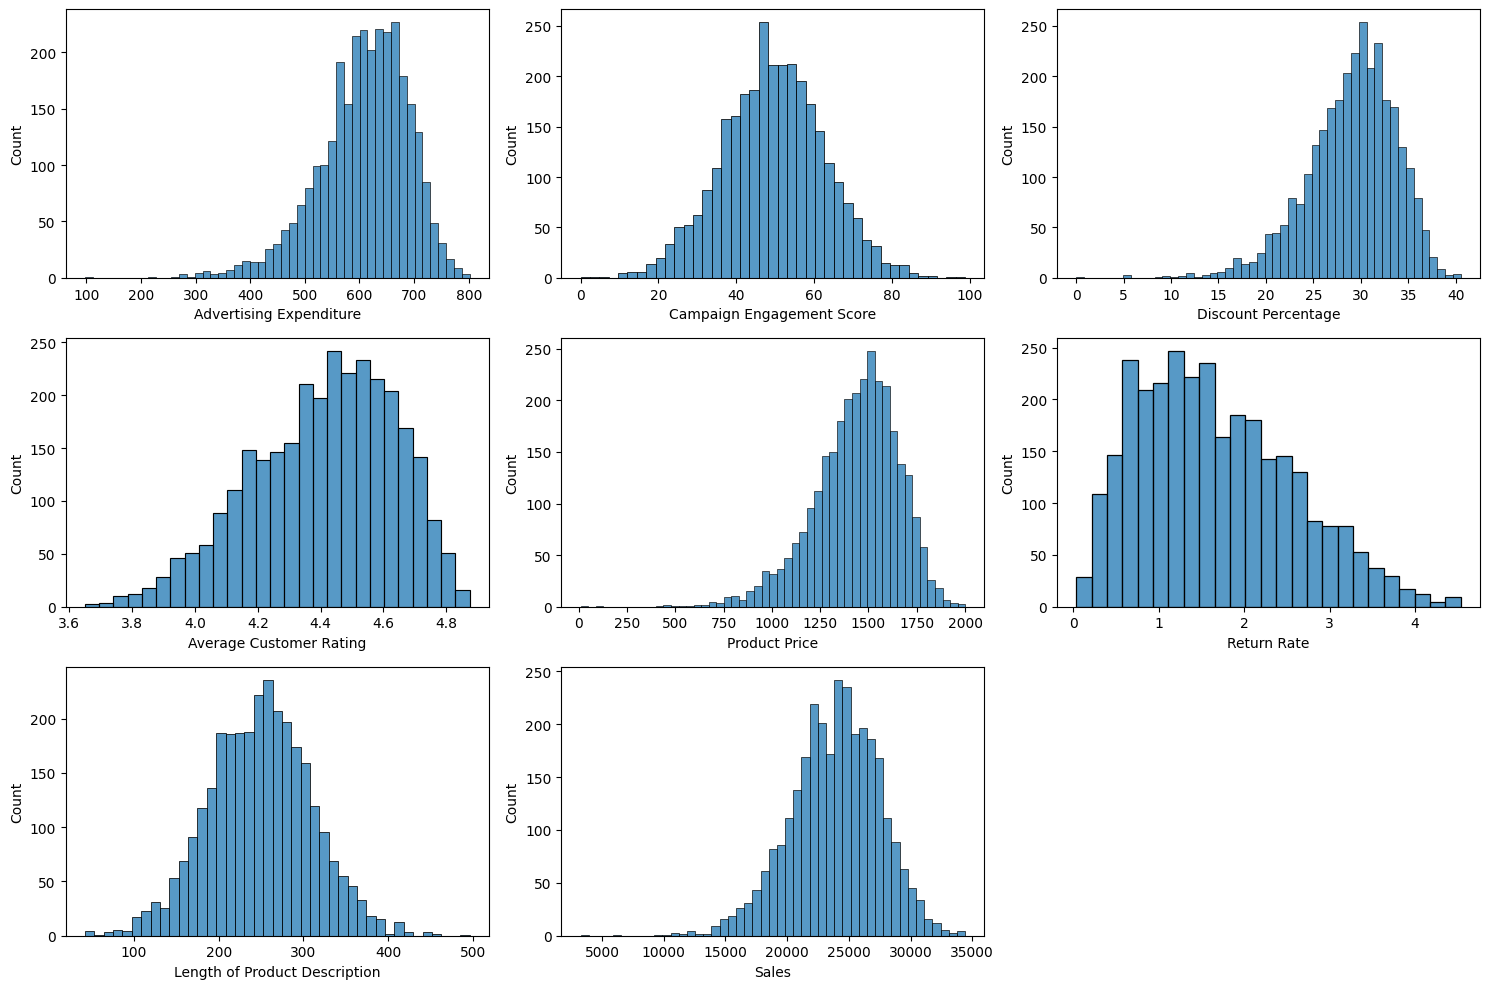

In [31]:
plt.figure(figsize=(15, 10))
features = data.select_dtypes(include=['number']).columns.to_list()

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=feature)

plt.tight_layout()
plt.show()

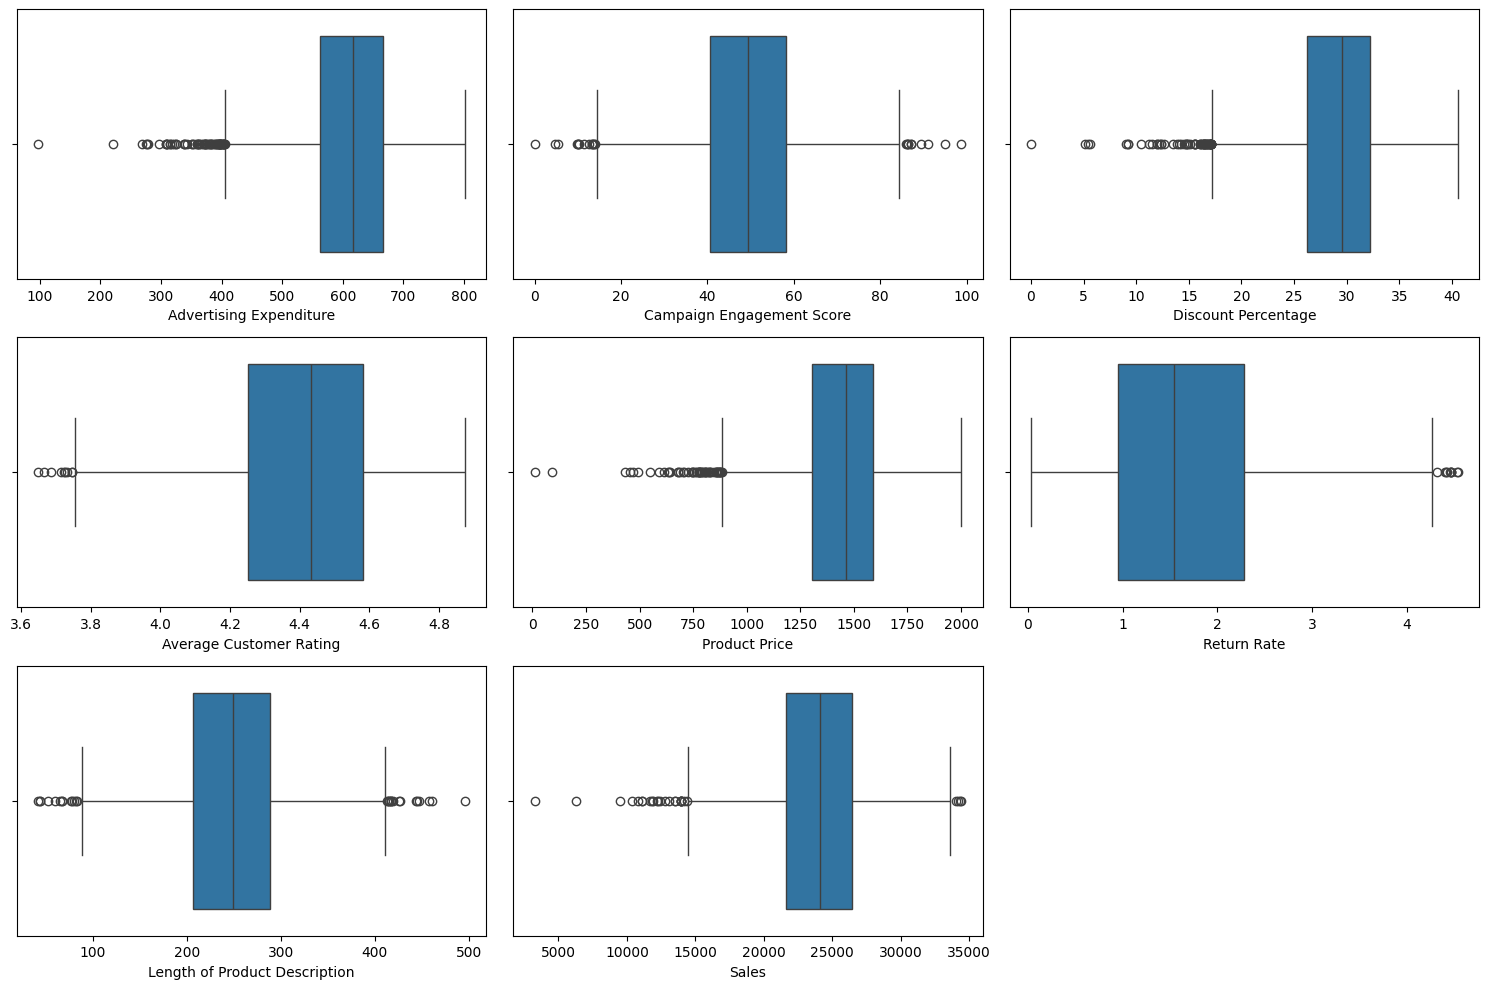

In [32]:
plt.figure(figsize=(15, 10))
features = data.select_dtypes(include=['number']).columns.to_list()

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data, x=feature)

plt.tight_layout()
plt.show()

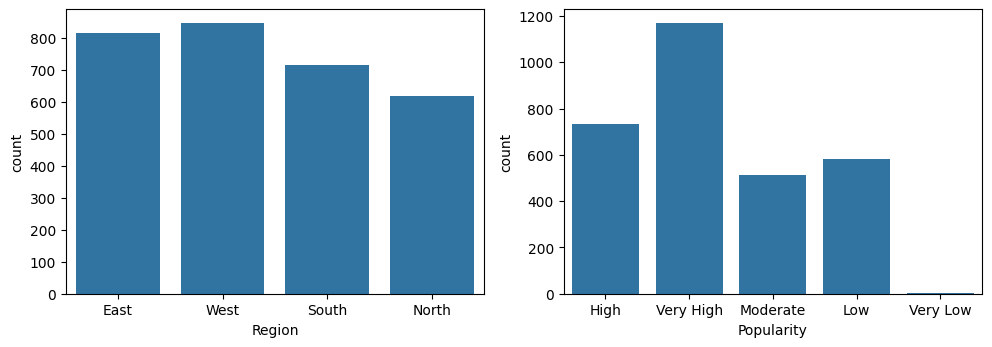

In [33]:
plt.figure(figsize=(15, 10))
features = data.select_dtypes(exclude=['number']).columns.to_list()

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=data, x=feature)

plt.tight_layout()
plt.show()

### EDA Multivariate

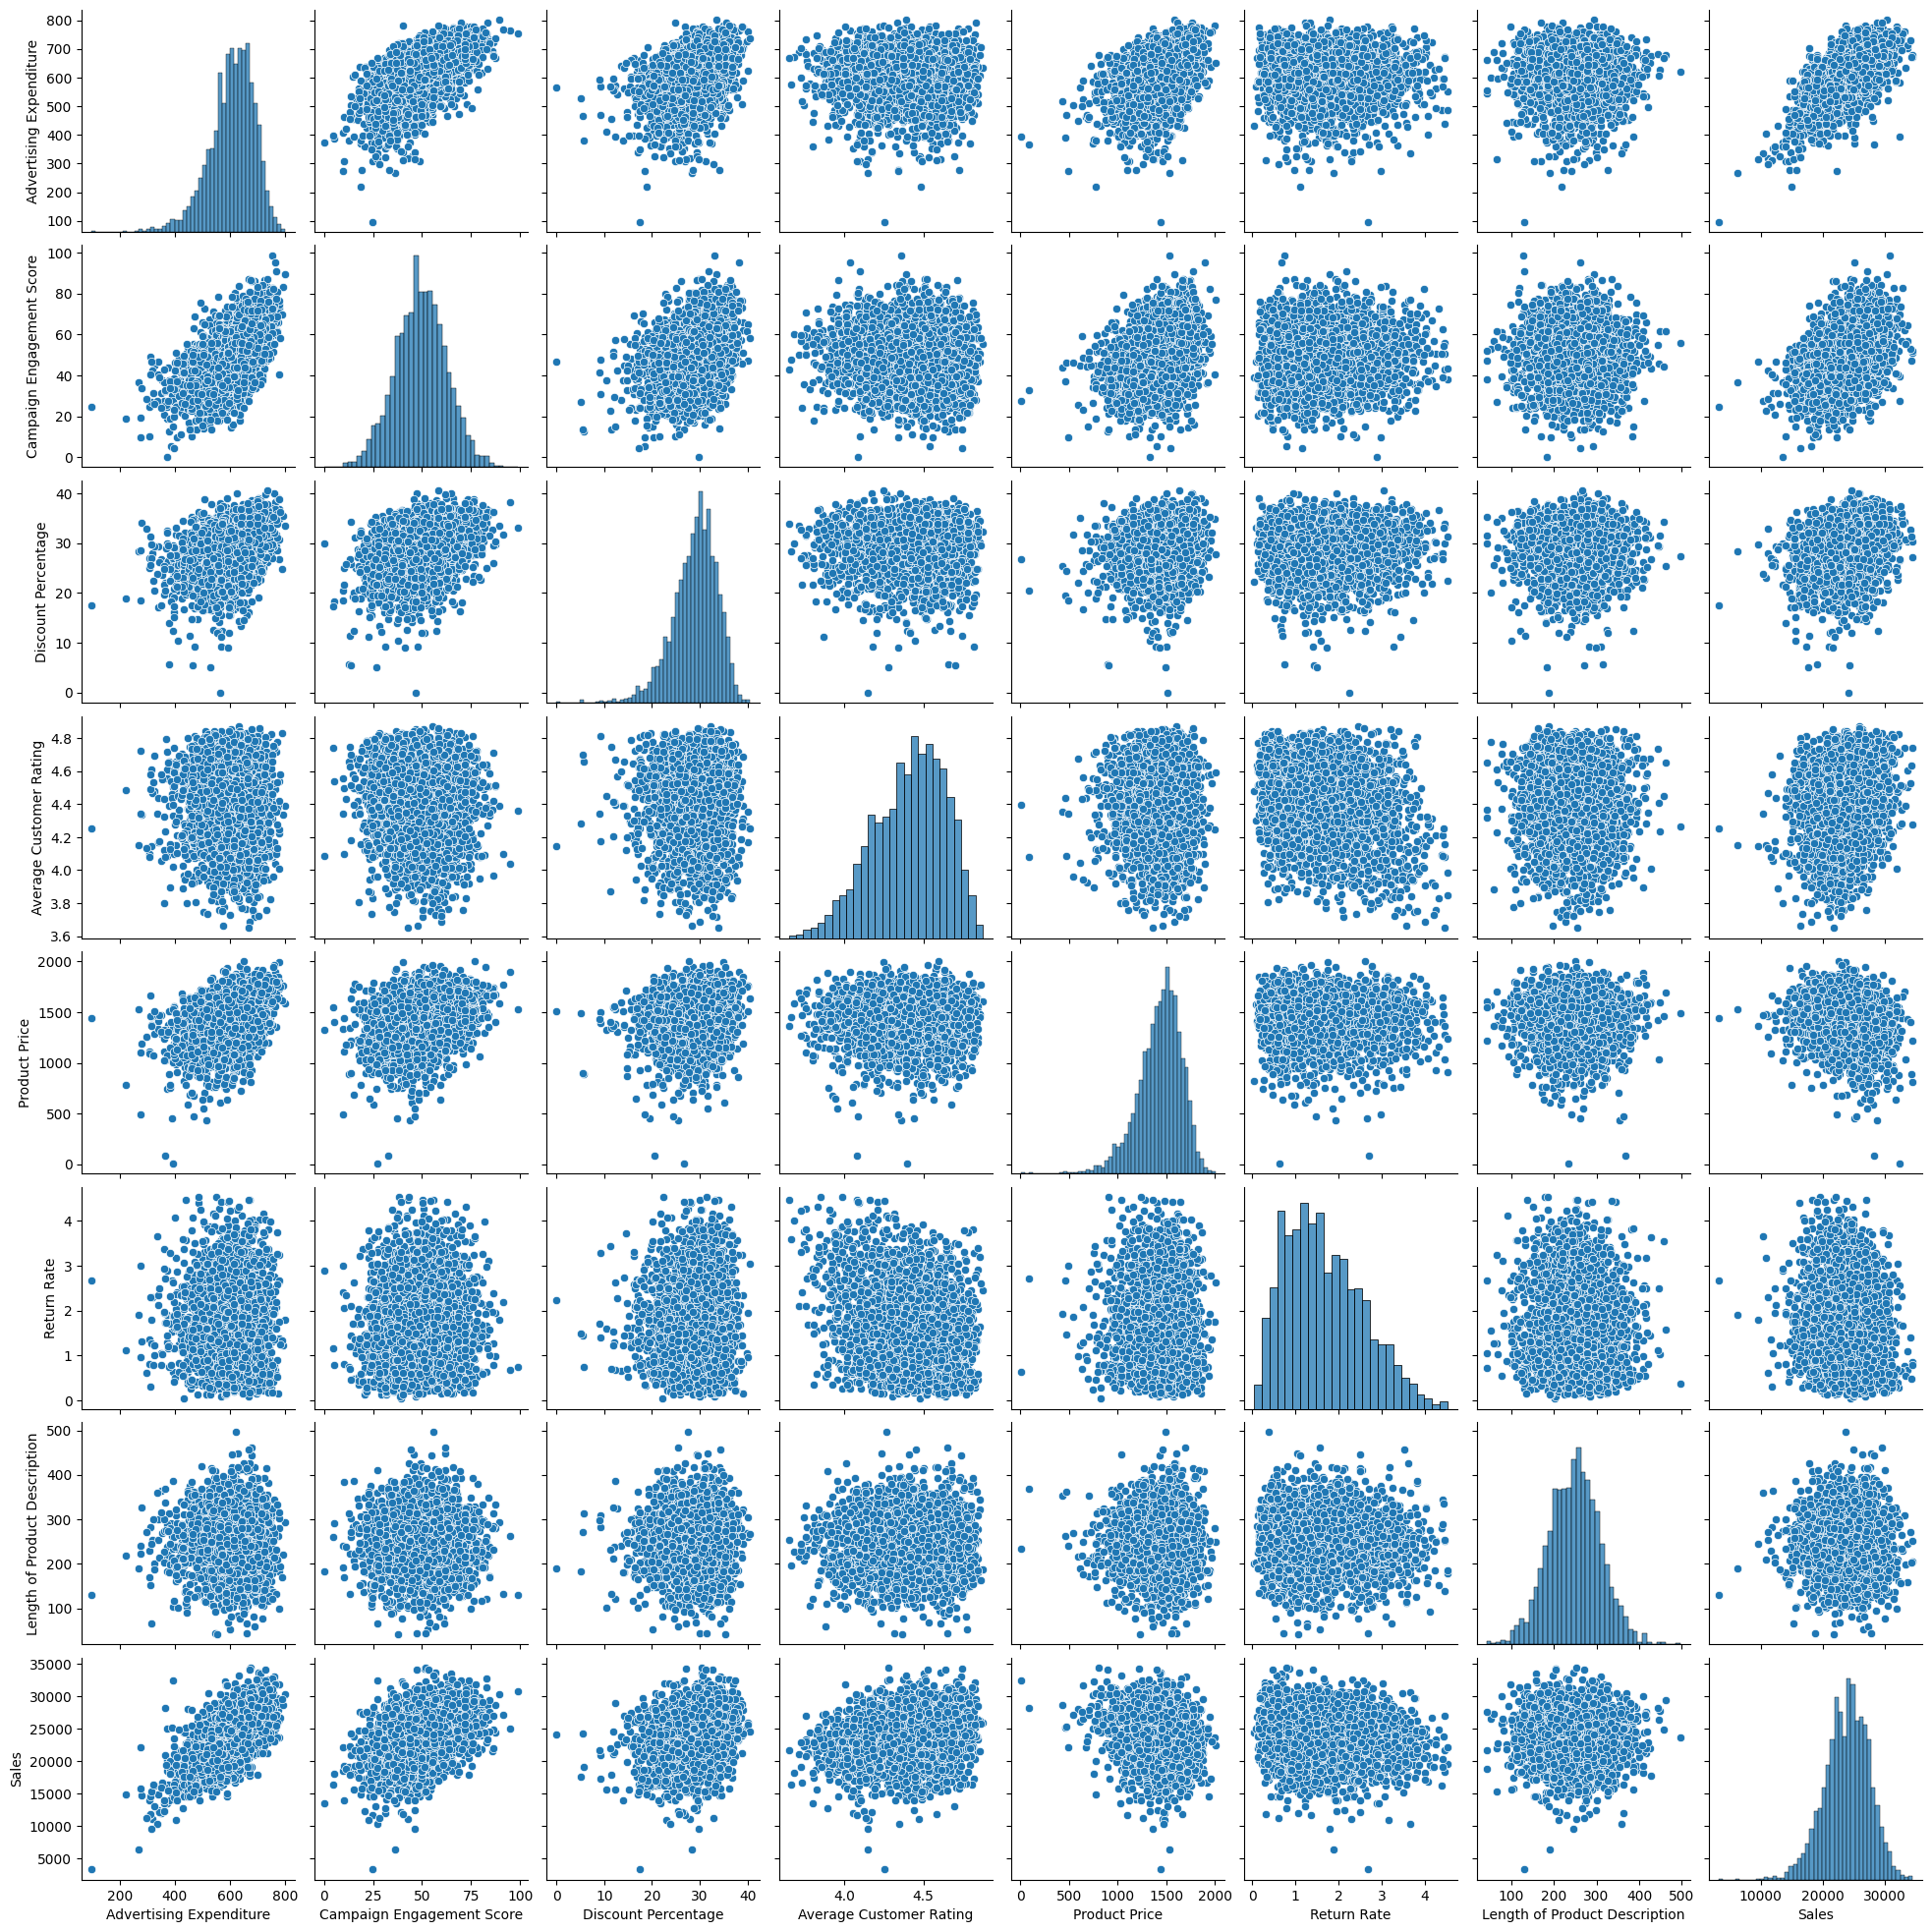

In [34]:
sns.pairplot(data)
plt.show()

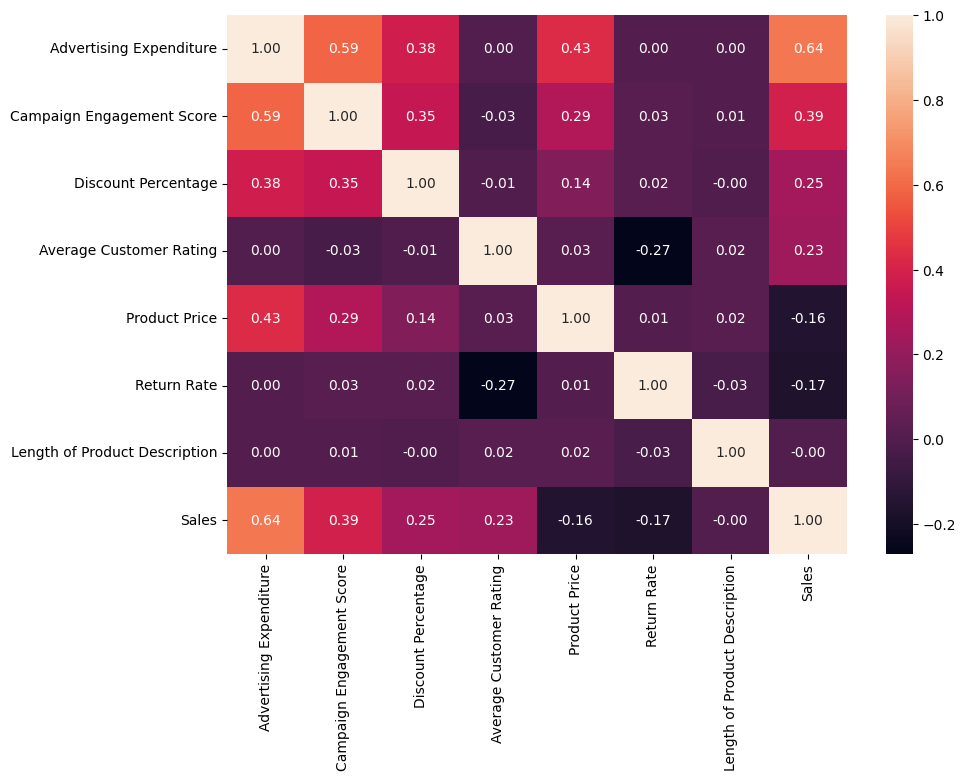

In [36]:
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(numeric_only = True), annot = True, fmt = '0.2f')
plt.show()

<Axes: xlabel='Popularity', ylabel='Sales'>

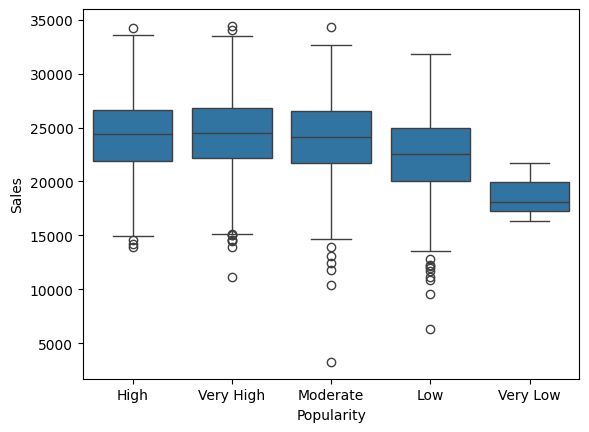

In [37]:
sns.boxplot(data=data, y = 'Sales', x = 'Popularity')

<Axes: xlabel='Region', ylabel='Sales'>

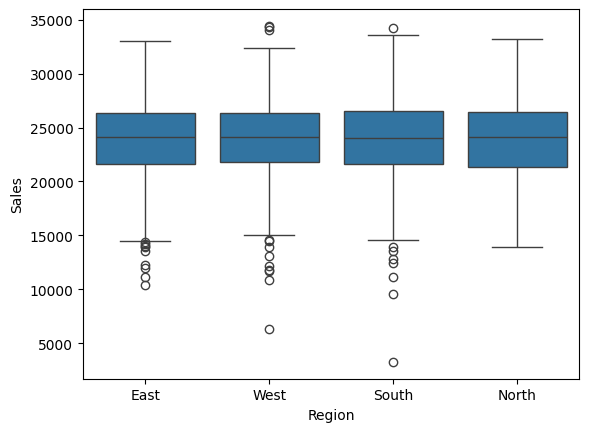

In [38]:
sns.boxplot(data=data, y = 'Sales', x = 'Region')

### Data Preparation for Modeling and model building

In [98]:
# defining the explanatory (independent) and response (dependant) variables
X = data.drop('Sales', axis = 1)
y = data['Sales']

In [99]:
# splitting the data in 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 33)

In [100]:
X_train

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity
1460,640.724166,60.216658,31.137557,4.215356,1322.250190,0.814561,294.279809,South,High
2770,658.780518,62.070012,27.554444,4.105641,1466.543483,2.880988,294.439587,East,Low
1967,506.638689,55.508693,26.347446,4.679001,1199.111853,0.459329,185.424310,West,High
2915,495.212601,46.565644,18.288032,4.619228,1603.236755,2.151652,252.354335,South,Moderate
2721,601.994478,40.726553,30.181432,4.731649,1469.494011,1.553896,251.908285,East,High
...,...,...,...,...,...,...,...,...,...
57,485.919490,53.240740,28.748852,4.585985,1399.737777,1.923184,292.332964,North,High
2706,683.135427,60.124268,34.770777,4.470857,1211.413343,2.403113,185.831022,North,Very High
578,467.265304,43.927663,27.283639,4.283493,1387.214692,1.055601,272.926546,East,Very High
1752,735.375061,87.101998,30.340570,4.517963,1671.283325,0.975317,334.531951,North,Very High


In [101]:
y_train

1460    26314.69510
2770    21840.92801
1967    25396.03852
2915    20789.61238
2721    21853.96588
           ...     
57      21268.91205
2706    30559.91659
578     15147.46008
1752    28639.64454
2439    21630.21166
Name: Sales, Length: 2400, dtype: float64

In [64]:
X_train.shape

(2400, 9)

In [176]:
print(type(X_train))
print(type(X_train[['Advertising Expenditure']]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [65]:
X_test.shape

(600, 9)

In [66]:
y_train.shape

(2400,)

In [67]:
ind_vars1 = ['Advertising Expenditure']

In [68]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X_train[ind_vars1], y_train)

LinearRegression()

In [69]:
print("Slope:", lin_reg1.coef_, "Intercept:", lin_reg1.intercept_)

Slope: [27.81466488] Intercept: 6957.139873218897


In [70]:
print("Sales = ", "(", lin_reg1.coef_[0], ")", "*", ind_vars1[0], "+", lin_reg1.intercept_)

Sales =  ( 27.814664875434648 ) * Advertising Expenditure + 6957.139873218897


#### Simple Linear Regression - Sales vs Advertising Expenditure

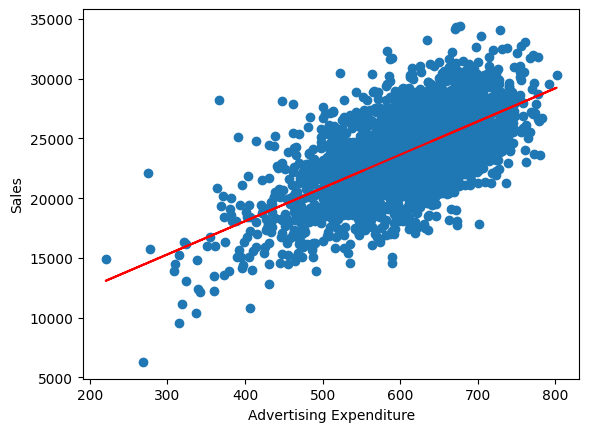

In [71]:
# plotting the best-fit line
fitted_values1 = lin_reg1.predict(X_train[ind_vars1])

# plot the scatterplot and regression line
plt.scatter(X_train[ind_vars1], y_train)
plt.plot(X_train[ind_vars1], fitted_values1, color='red')
plt.xlabel(ind_vars1[0])
plt.ylabel('Sales')
plt.show()

#### Simple Linear Regression - Sales vs Discount Percentage

In [72]:
ind_vars2 = ['Discount Percentage']

In [74]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train[ind_vars2], y_train)

LinearRegression()

In [ ]:
print("Slope:", lin_reg2.coef_, "Intercept:", lin_reg2.intercept_)
print("Sales = ", "(", lin_reg2.coef_[0], ")", "*", ind_vars2[0], "+", lin_reg2.intercept_)

Slope: [183.88644399] Intercept: 18536.02065211742
Sales =  ( 183.88644399293418 ) * Discount Percentage + 18536.02065211742


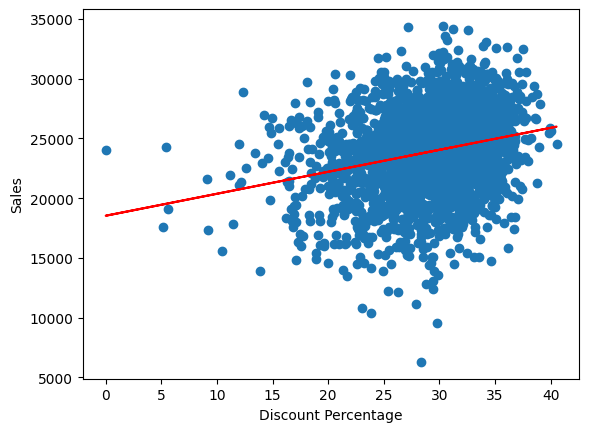

In [76]:
# plotting the best-fit line
fitted_values2 = lin_reg2.predict(X_train[ind_vars2])

# plot the scatterplot and regression line
plt.scatter(X_train[ind_vars2], y_train)
plt.plot(X_train[ind_vars2], fitted_values2, color='red')
plt.xlabel(ind_vars2[0])
plt.ylabel('Sales')
plt.show()

#### Simple Linear Regression - Sales vs Product Price

In [ ]:
ind_vars3 = ['Product Price']

In [78]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X_train[ind_vars3], y_train)

LinearRegression()

In [79]:
print("Slope:", lin_reg3.coef_, "Intercept:", lin_reg3.intercept_)
print("Sales = ", "(", lin_reg3.coef_[0], ")", "*", ind_vars3[0], "+", lin_reg3.intercept_)

Slope: [-2.43156859] Intercept: 27356.21516146995
Sales =  ( -2.431568590849451 ) * Product Price + 27356.21516146995


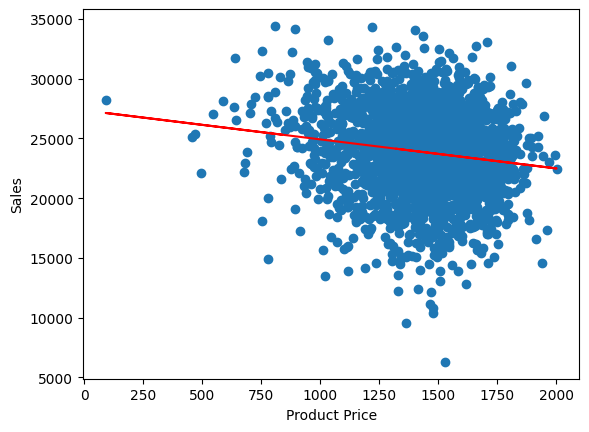

In [81]:
# plotting the best-fit line
fitted_values3 = lin_reg3.predict(X_train[ind_vars3])

# plot the scatterplot and regression line
plt.scatter(X_train[ind_vars3], y_train)
plt.plot(X_train[ind_vars3], fitted_values3, color='red')
plt.xlabel(ind_vars3[0])
plt.ylabel('Sales')
plt.show()

#### Multiple Linear Regression - Sales vs Advertising Expenditure, discount Percentage

In [102]:
ind_vars4 = ['Advertising Expenditure', 'Discount Percentage']

In [103]:
lin_reg4 = LinearRegression()
lin_reg4.fit(X_train[ind_vars4], y_train)

LinearRegression()

In [105]:
print("Coefficients:", lin_reg4.coef_, "Intercept:", lin_reg4.intercept_)

Coefficients: [27.9270056  -4.88782387] Intercept: 7030.542610655219


In [106]:
print(f"Sales = ({lin_reg4.coef_[0]}) * {ind_vars4[0]} + ({lin_reg4.coef_[1]}) * {ind_vars4[1]} + {lin_reg4.intercept_}")

Sales = (27.9270055990105) * Advertising Expenditure + (-4.887823874914991) * Discount Percentage + 7030.542610655219


#### Multiple Linear Regression - Sales vs Advertising Expenditure, discount Percentage, Product Price

In [107]:
ind_vars5 = ['Advertising Expenditure', 'Discount Percentage', 'Product Price']

In [108]:
lin_reg5 = LinearRegression()
lin_reg5.fit(X_train[ind_vars5], y_train)

LinearRegression()

In [109]:
print("Coefficients:", lin_reg5.coef_, "Intercept:", lin_reg5.intercept_)

Coefficients: [38.4153768  -7.87172561 -8.58848668] Intercept: 13065.007884619068


In [112]:
print(f"Sales = ({lin_reg5.coef_[0]}) * {ind_vars5[0]} + ({lin_reg5.coef_[1]}) * {ind_vars5[1]} + ({lin_reg5.coef_[2]}) * {ind_vars5[2]} + {lin_reg5.intercept_}")

Sales = (38.41537679506463) * Advertising Expenditure + (-7.871725606774409) * Discount Percentage + (-8.588486677626662) * Product Price + 13065.007884619068


#### Multiple Linear Regression - Sales vs Advertising Expenditure, discount Percentage, Product Price and Popularity

In [116]:
X['Popularity'].unique()

array(['High', 'Very High', 'Moderate', 'Low', 'Very Low'], dtype=object)

In [117]:
lab_enc = {
    'Very Low' : 1,
    'Low' : 2,
    'Moderate' : 3,
    'High' : 4,
    'Very High' : 5
}

In [118]:
X.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,High
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,Very High
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,Very High
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,Very High
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,Moderate


In [119]:
X['Popularity'] = X['Popularity'].map(lambda x: lab_enc[x])

In [128]:
X.loc[X['Popularity'] == 1]

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity
1208,673.315253,59.927423,29.908455,3.684753,1585.760437,4.009960,227.653235,West,1
1639,574.539022,47.585863,28.348410,3.665261,1456.306257,3.584759,197.513064,North,1
2117,669.640569,42.731638,33.865801,3.649450,1363.217406,4.468819,253.956344,West,1


In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 33)

In [136]:
ind_vars6 = ['Advertising Expenditure', 'Discount Percentage', 'Product Price', 'Popularity']

In [137]:
lin_reg6 = LinearRegression()
lin_reg6.fit(X_train[ind_vars6], y_train)


LinearRegression()

In [138]:
print("Coefficients:", lin_reg6.coef_, "Intercept:", lin_reg6.intercept_)

Coefficients: [ 38.30431742  -6.89954045  -8.65974314 560.45149887] Intercept: 11055.627594239915


In [139]:
print(
    "Sales = ",
    "(", lin_reg6.coef_[0], ")", "*", ind_vars6[0],
    "+ (", lin_reg6.coef_[1], ")", "*", ind_vars6[1],
    "+ (", lin_reg6.coef_[2], ")", "*", ind_vars6[2],
    "+ (", lin_reg6.coef_[3], ")", "*", ind_vars6[3],
    "+", lin_reg6.intercept_,

)

Sales =  ( 38.30431741812173 ) * Advertising Expenditure + ( -6.899540451008118 ) * Discount Percentage + ( -8.659743138298209 ) * Product Price + ( 560.4514988703031 ) * Popularity + 11055.627594239915


#### Multiple Linear Regression - Sales vs All independent variables
'Region' is nominal value. It has not order and hence will use one-hot encoding.

##### Just testing how OneHotEncoder works

In [182]:
x_test = data[['Region']].copy()
x_test

,Region
0,East
1,West
2,South
3,South
4,East
...,...
2995,North
2996,West
2997,South
2998,West


In [189]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
x_test_transformed = ohe.fit_transform(x_test)
print(x_test_transformed)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [145]:
X = pd.get_dummies(
    X,
    columns = X.select_dtypes(include=['object', 'category']).columns.to_list(),
    drop_first=True
)
X = X.astype(float)
X.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Popularity,Region_North,Region_South,Region_West
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,4.0,0.0,0.0,0.0
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,5.0,0.0,0.0,1.0
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,5.0,0.0,1.0,0.0
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,5.0,0.0,1.0,0.0
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,3.0,0.0,0.0,0.0


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 33)

In [147]:
lin_reg7 = LinearRegression()
lin_reg7.fit(X_train, y_train)

LinearRegression()

In [148]:
print(
    "Coefficients:", lin_reg7.coef_, lin_reg7.intercept_
)

Coefficients: [ 3.66572562e+01  2.06239053e+01 -1.01466276e+01  2.67056373e+03
 -8.75331673e+00 -5.09925564e+02 -1.05136877e-01  1.69474724e+02
 -5.26939383e+01  8.63848605e+01  1.88975497e+02] 1798.1491505011873


In [ ]:
equation = "Sales = ( " + str(lin_reg7.coef_[0]) + " ) * " + X_train.columns.tolist()[0]

for i in range(1, lin_reg7.coef_.shape[0]):
    equation += " + ( " + str(lin_reg7.coef_[i]) + " ) * " + X_train.columns.tolist()[i]

equation +=  " + " + str(lin_reg7.intercept_)

print(equation)


Sales = ( 36.65725616513078 ) * Advertising Expenditure + ( 20.623905258568115 ) * Campaign Engagement Score + ( -10.146627620220361 ) * Discount Percentage + ( 2670.563729597569 ) * Average Customer Rating + ( -8.75331673207741 ) * Product Price + ( -509.9255637703644 ) * Return Rate + ( -0.10513687699852992 ) * Length of Product Description + ( 169.47472378726366 ) * Popularity + ( -52.69393828913973 ) * Region_North + ( 86.38486045309367 ) * Region_South + ( 188.97549732071283 ) * Region_West + 1798.1491505011873


### Model performance evaluation

Define a set of utility functions to compute MAPE and Adjusted $R^2$, and to collate all metrics into a single dataframe.

In [150]:
# Compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# Compute Adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute diffferent metrics to check regression model performance

    model: regression model
    predictors: independent variable
    target: dependent variable
    """
    pred = model.predict(predictors)

    rmse = np.sqrt(mean_squared_error(target, pred)) # Compute RMSE
    mae = mean_absolute_error(target, pred) # Compute MAE
    mape = mape_score(target, pred) # Compute MAPE
    r2 = r2_score(target, pred) # Compute R-squared
    adj_r2 = adj_r2_score(predictors, target, pred) # Compute Adjusted R-squared


    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R2": r2,
            "Adjusted R2": adj_r2
        },
        index=[0],
    )
        
    return df_perf
    


#### Simple Linear Regression - Sales vs Advertising Expenditure

In [151]:
lin_reg1_train_perf = model_performance_regression(lin_reg1, X_train[ind_vars1], y_train)
lin_reg1_train_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,2765.927182,2201.001677,9.633273,0.401381,0.401131


In [152]:
lin_reg1_test_perf = model_performance_regression(lin_reg1, X_test[ind_vars1], y_test)
lin_reg1_test_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,2808.028017,2255.568556,10.111515,0.440004,0.439068


#### Simple Linear Regression - Sales vs Discount Percentage

In [153]:
lin_reg2_train_perf = model_performance_regression(lin_reg2, X_train[ind_vars2], y_train)
lin_reg2_train_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,3466.651715,2752.82186,12.402679,0.05965,0.059258


In [154]:
lin_reg2_test_perf = model_performance_regression(lin_reg2, X_test[ind_vars2], y_test)
lin_reg2_test_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,3615.319248,2835.050613,13.58022,0.071729,0.070176


#### Simple Linear Regression - Sales vs Product Price

In [155]:
lin_reg3_train_perf = model_performance_regression(lin_reg3, X_train[ind_vars3], y_train)
lin_reg3_train_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,3533.354907,2800.186461,12.660792,0.023115,0.022707


In [156]:
lin_reg3_test_perf = model_performance_regression(lin_reg3, X_test[ind_vars3], y_test)
lin_reg3_test_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,3699.088255,2913.87796,14.078519,0.028213,0.026588


#### Multiple Linear Regression - `Sales` vs `Advertising Expenditure`, `Discount Percentage'

In [157]:
lin_reg4_train_perf = model_performance_regression(lin_reg4, X_train[ind_vars4], y_train)
lin_reg4_train_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,2765.844942,2201.313015,9.634094,0.401417,0.400917


In [162]:
lin_reg4_test_perf = model_performance_regression(lin_reg4, X_test[ind_vars4], y_test)
lin_reg4_test_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,2809.275044,2256.320708,10.114015,0.439507,0.437629


#### Multiple Linear Regression - `Sales` vs `Advertising Expenditure`, `Discount Percentage', 'Product Price'

In [158]:
lin_reg5_train_perf = model_performance_regression(lin_reg5, X_train[ind_vars5], y_train)
lin_reg5_train_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,2164.38838,1751.355885,7.628166,0.633445,0.632986


In [163]:
lin_reg5_test_perf = model_performance_regression(lin_reg5, X_test[ind_vars5], y_test)
lin_reg5_test_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,2201.750995,1763.656624,7.72004,0.655715,0.653982


#### Multiple Linear Regression - `Sales` vs `Advertising Expenditure`, `Discount Percentage', 'Product Price', 'Popularity'

In [159]:
lin_reg6_train_perf = model_performance_regression(lin_reg6, X_train[ind_vars6], y_train)
lin_reg6_train_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,2066.112255,1670.272484,7.252444,0.665977,0.665419


In [164]:
lin_reg6_test_perf = model_performance_regression(lin_reg6, X_test[ind_vars6], y_test)
lin_reg6_test_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,2099.77086,1677.076661,7.289373,0.686869,0.684764


#### Multiple Linear Regression - `Sales` vs `All independent variables'

In [161]:
lin_reg7_train_perf = model_performance_regression(lin_reg7, X_train, y_train)
lin_reg7_train_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,1921.052229,1555.372788,6.75453,0.711233,0.709903


In [171]:
lin_reg7_test_perf = model_performance_regression(lin_reg7, X_test, y_test)
lin_reg7_test_perf

,RMSE,MAE,MAPE,R2,Adjusted R2
0,1988.463802,1599.612897,6.939521,0.719187,0.713934


### Model performance comparision

In [173]:
# training performance comparison

# concatenating all the training performance dataframes
models_train_comp_df = pd.concat(
    [
        lin_reg1_train_perf.T,
        lin_reg2_train_perf.T,
        lin_reg3_train_perf.T,
        lin_reg4_train_perf.T,
        lin_reg5_train_perf.T,
        lin_reg6_train_perf.T,
        lin_reg7_train_perf.T,
    ],
    axis=1,
)

# defining the list of models built
models_train_comp_df.columns = [
    "Simple Linear Regression - Sales vs Advertising Expenditure",
    "Simple Linear Regression - Sales vs Discount Percentage",
    "Simple Linear Regression - Sales vs Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",
    "Multiple Linear Regression - Sales vs All independent variables",
]

print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,RMSE,MAE,MAPE,R2,Adjusted R2
Simple Linear Regression - Sales vs Advertising Expenditure,2765.927182,2201.001677,9.633273,0.401381,0.401131
Simple Linear Regression - Sales vs Discount Percentage,3466.651715,2752.821860,12.402679,0.059650,0.059258
Simple Linear Regression - Sales vs Product Price,3533.354907,2800.186461,12.660792,0.023115,0.022707
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",2765.844942,2201.313015,9.634094,0.401417,0.400917
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",2164.388380,1751.355885,7.628166,0.633445,0.632986
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",2066.112255,1670.272484,7.252444,0.665977,0.665419
Multiple Linear Regression - Sales vs All independent variables,1921.052229,1555.372788,6.754530,0.711233,0.709903


In [172]:
# test performance comparison

# concatenating all the test performance dataframes
models_test_comp_df = pd.concat(
    [
        lin_reg1_test_perf.T,
        lin_reg2_test_perf.T,
        lin_reg3_test_perf.T,
        lin_reg4_test_perf.T,
        lin_reg5_test_perf.T,
        lin_reg6_test_perf.T,
        lin_reg7_test_perf.T,
    ],
    axis=1,
)

# defining the list of models built
models_test_comp_df.columns = [
    "Simple Linear Regression - Sales vs Advertising Expenditure",
    "Simple Linear Regression - Sales vs Discount Percentage",
    "Simple Linear Regression - Sales vs Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",
    "Multiple Linear Regression - Sales vs All independent variables",
]

print("Test performance comparison:")
models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,MAPE,R2,Adjusted R2
Simple Linear Regression - Sales vs Advertising Expenditure,2808.028017,2255.568556,10.111515,0.440004,0.439068
Simple Linear Regression - Sales vs Discount Percentage,3615.319248,2835.050613,13.580220,0.071729,0.070176
Simple Linear Regression - Sales vs Product Price,3699.088255,2913.877960,14.078519,0.028213,0.026588
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",2809.275044,2256.320708,10.114015,0.439507,0.437629
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",2201.750995,1763.656624,7.720040,0.655715,0.653982
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",2099.770860,1677.076661,7.289373,0.686869,0.684764
Multiple Linear Regression - Sales vs All independent variables,1988.463802,1599.612897,6.939521,0.719187,0.713934


* Advertising Expenditure seems to be a good predictor of Sales.
* Discount Percentage and Product Price are individually poor predictors of Sales. But when combined with Advertising Expenditure, they together provide good predictive power.
* The final model with all independent variables exhibits the best performance.